In [38]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Importing the dataset
df = pd.read_csv('customer_booking.csv',encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
#Getting an idea about the duplicates in the data
df.duplicated().sum()

719

In [5]:
#Dropping the duplicates
df.drop_duplicates(inplace=True)

In [6]:
#Getting an idea about the duplicates in the data
df.duplicated().sum()

0

In [7]:
#Now our data won't have duplciates

In [8]:
# Getting an idea about NULL values
df.isnull().sum().any()


False

In [11]:
df.isnull().sum()


,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [10]:
#Getting idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [13]:
'''
Conclusions ->

(1) "Wants_extra_baggage", "wants_preferred_seat","wants_in_flight_meals", and "booking_complete"
could be converted to boolean data types.

(2) All the other columns are in correct data types as expected.

'''

'\nConclusions ->\n\n(1) "Wants_extra_baggage", "wants_preferred_seat","wants_in_flight_meals", and "booking_complete"\ncould be converted to boolean data types.\n\n(2) All the other columns are in correct data types as expected.\n\n'

In [12]:
#Perform statistical analysis
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [22]:
'''
Conclusions ->

(1) From the "num_passengers column , we can see that min, 25%, 50% is at 1, implying that majority of the passengers are travelling solo.
(2) From the "Purchase_lead column, and "length_of_stay" column,we can see that mean is significantly greater than median, implying that
there are some outliers in the right tail.
(3)From "flight_hour" column and "flight_duration" , we can see that mean and median are approximately equal that implying that the data is symmentric.

'''

'\nConclusions ->\n\n(1) From the "num_passengers column , we can see that min, 25%, 50% is at 1, implying that majority of the passengers are travelling solo.\n(2) From the "Purchase_lead column, and "length_of_stay" column,we can see that mean is significantly greater than median, implying that\nthere are some outliers in the right tail.\n(3)From "flight_hour" column and "flight_duration" , we can see that mean and median are approximately equal that implying that the data is symmentric.\n\n'

In [16]:
 #EDA on categorical data
 df['wants_extra_baggage'].sum()

32931

In [17]:
 df['wants_preferred_seat'].sum()

14569

In [18]:
 df['wants_in_flight_meals'].sum()

21025

In [19]:
 df['booking_complete'].sum()

7391

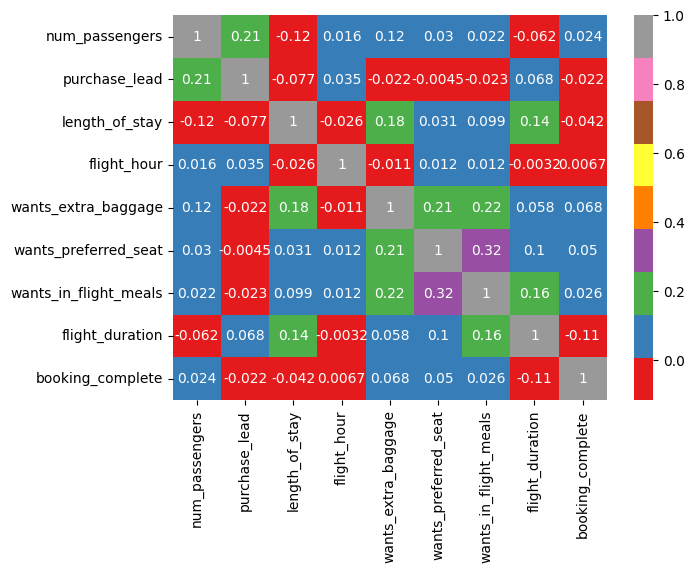

In [21]:
#Correlation analysis
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Set1')
plt.show()

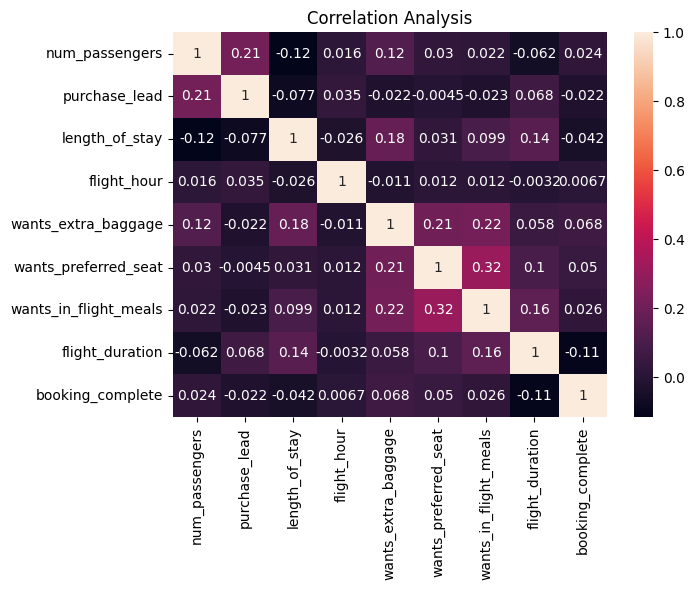

In [24]:
#Correlation analysis
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation Analysis')
plt.show()

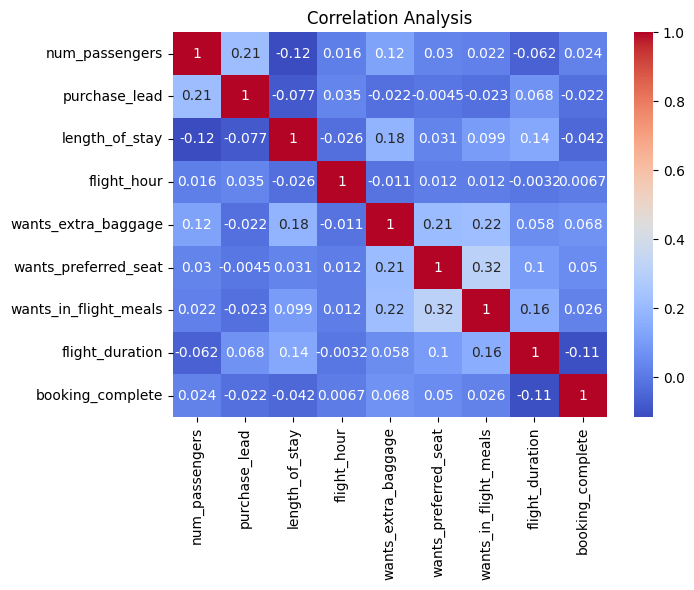

In [25]:
#Correlation analysis
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

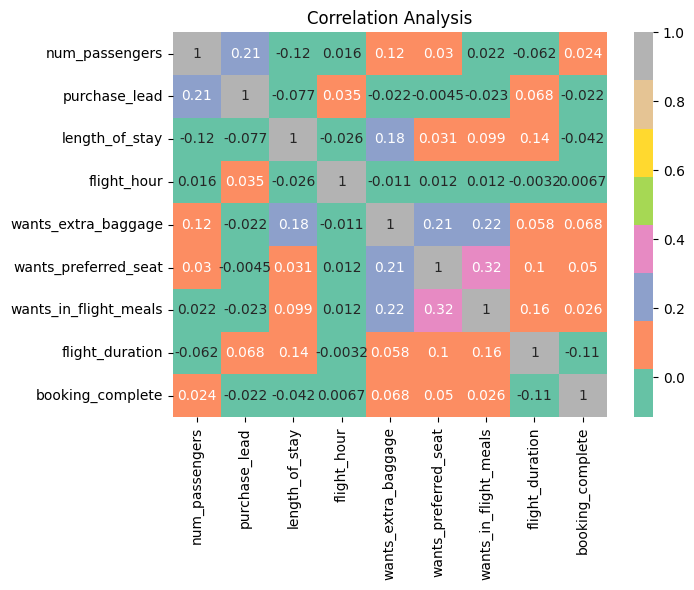

In [26]:
#Correlation analysis
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Set2')
plt.title('Correlation Analysis')
plt.show()

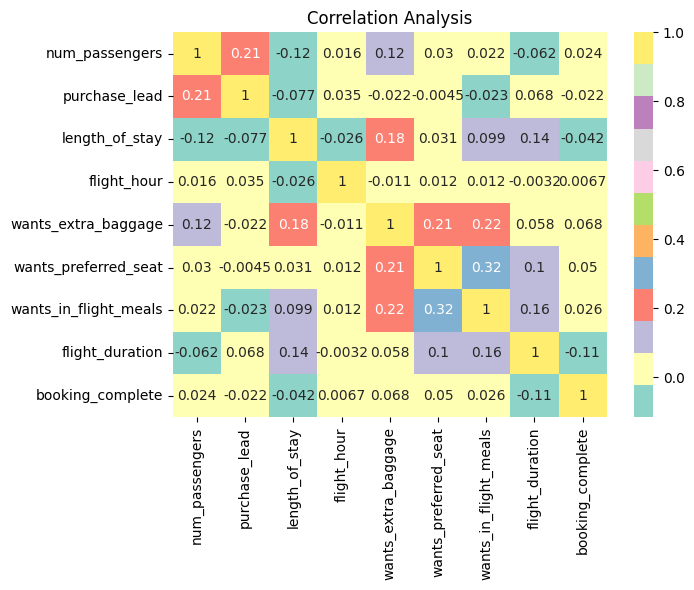

In [27]:
#Correlation analysis
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Set3')
plt.title('Correlation Analysis')
plt.show()

In [ ]:
'''
Conclusions ->

(1) "want_preferred_seat","wants_extra_baggage","wants_in_flight_meals" have a weak positive correlation
(2) Other than this all the features are almost uncorrelated w.r.t each other.
'''

In [28]:
#Getting the proportion of values in "trip_type"
df['trip_type'].value_counts(normalize=True)

,proportion
trip_type,
RoundTrip,0.989814
OneWay,0.007833
CircleTrip,0.002354


In [29]:
# 98% of booking are Roundtrips


In [30]:
#Getting Sales channel percentage"
df['sales_channel'].value_counts(normalize=True)

,proportion
sales_channel,
Internet,0.891155
Mobile,0.108845


In [31]:
# 89% sales happened through Internet.

In [32]:
#Getting flight_day"
df['flight_day'].value_counts(normalize=True)

,proportion
flight_day,
Mon,0.162091
Wed,0.153447
Tue,0.153365
Thu,0.148597
Fri,0.135651
Sun,0.130720
Sat,0.116130


In [33]:
#All booking are almost equally distributed among all weekdays with More booking on Monday.


In [36]:
#Getting Route"
df['route'].value_counts(normalize=True)

,proportion
route,
AKLKUL,0.053165
PENTPE,0.018506
MELSGN,0.016903
ICNSIN,0.016091
DMKKIX,0.014793
...,...
AKLHGH,0.000020
JEDPDG,0.000020
JEDPEN,0.000020


In [ ]:
#AKLKUL (Auckland - Kaula Lampur ) is the most common route.

In [37]:
#Getting Booking Origin"
df['booking_origin'].value_counts(normalize=True)

,proportion
booking_origin,
Australia,0.358982
Malaysia,0.143159
South Korea,0.091354
Japan,0.077494
China,0.066638
...,...
Panama,0.000020
Tonga,0.000020
Tanzania,0.000020


In [ ]:
#Australia, Malaysia,Japan, China,South corea are having origin for most of the bookings.
